In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()

In [4]:
cursor.execute("DELETE FROM sales")

sales_data = [
    ("Laptop", 5, 50000),
    ("Mobile", 10, 20000),
    ("Tablet", 7, 15000),
    ("Laptop", 3, 52000),
    ("Mobile", 6, 21000)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)

conn.commit()

In [5]:
query = """
SELECT product,
SUM(quantity) AS total_qty,
SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [6]:
df = pd.read_sql_query(query, conn)
df

,product,total_qty,revenue
0,Laptop,8,406000.0
1,Mobile,16,326000.0
2,Tablet,7,105000.0


Observation:

- Mobile has highest quantity sold.
- Laptop generated highest revenue.
- Tablet has moderate sales performance.

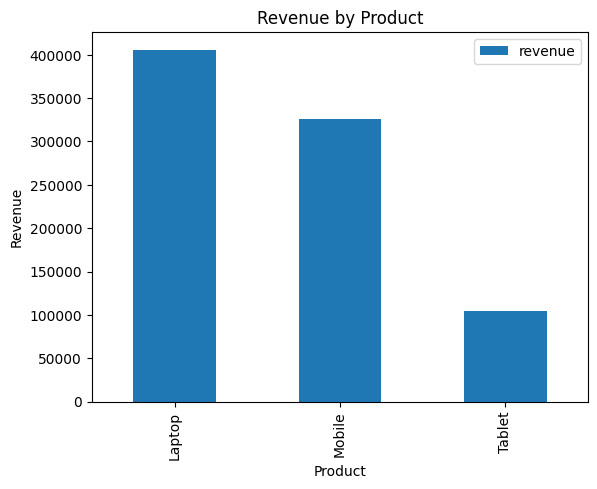

In [7]:
df.plot(kind='bar', x='product', y='revenue')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

plt.savefig("sales_chart.png")  # Saves chart in folder
plt.show()

In [8]:
conn.close()